Processing file 1/30: ./perf_output/out_vm/pr-road.1.perf
Insufficient data for ./perf_output/out_vm/pr-road.1.perf
Processing file 1/30: ./perf_output/out_vm/pr-twitter.1.perf
Processing file 2/30: ./perf_output/out_vm/bc-urand.1.perf
Processing file 3/30: ./perf_output/out_vm/cc-kron.1.perf
Processing file 4/30: ./perf_output/out_vm/sssp-twitter.1.perf
Processing file 5/30: ./perf_output/out_vm/bfs-kron.1.perf
Processing file 6/30: ./perf_output/out_vm/sssp-road.1.perf
Processing file 7/30: ./perf_output/out_vm/pr-web.1.perf
Processing file 8/30: ./perf_output/out_vm/bfs-road.1.perf
Processing file 9/30: ./perf_output/out_vm/bc-road.1.perf
Processing file 10/30: ./perf_output/out_vm/bfs-urand.1.perf
Processing file 11/30: ./perf_output/out_vm/tc-twitter.1.perf
Processing file 12/30: ./perf_output/out_vm/bfs-web.1.perf
Processing file 13/30: ./perf_output/out_vm/sssp-kron.1.perf
Processing file 14/30: ./perf_output/out_vm/cc-twitter.1.perf
Insufficient data for ./perf_output/out_vm/cc

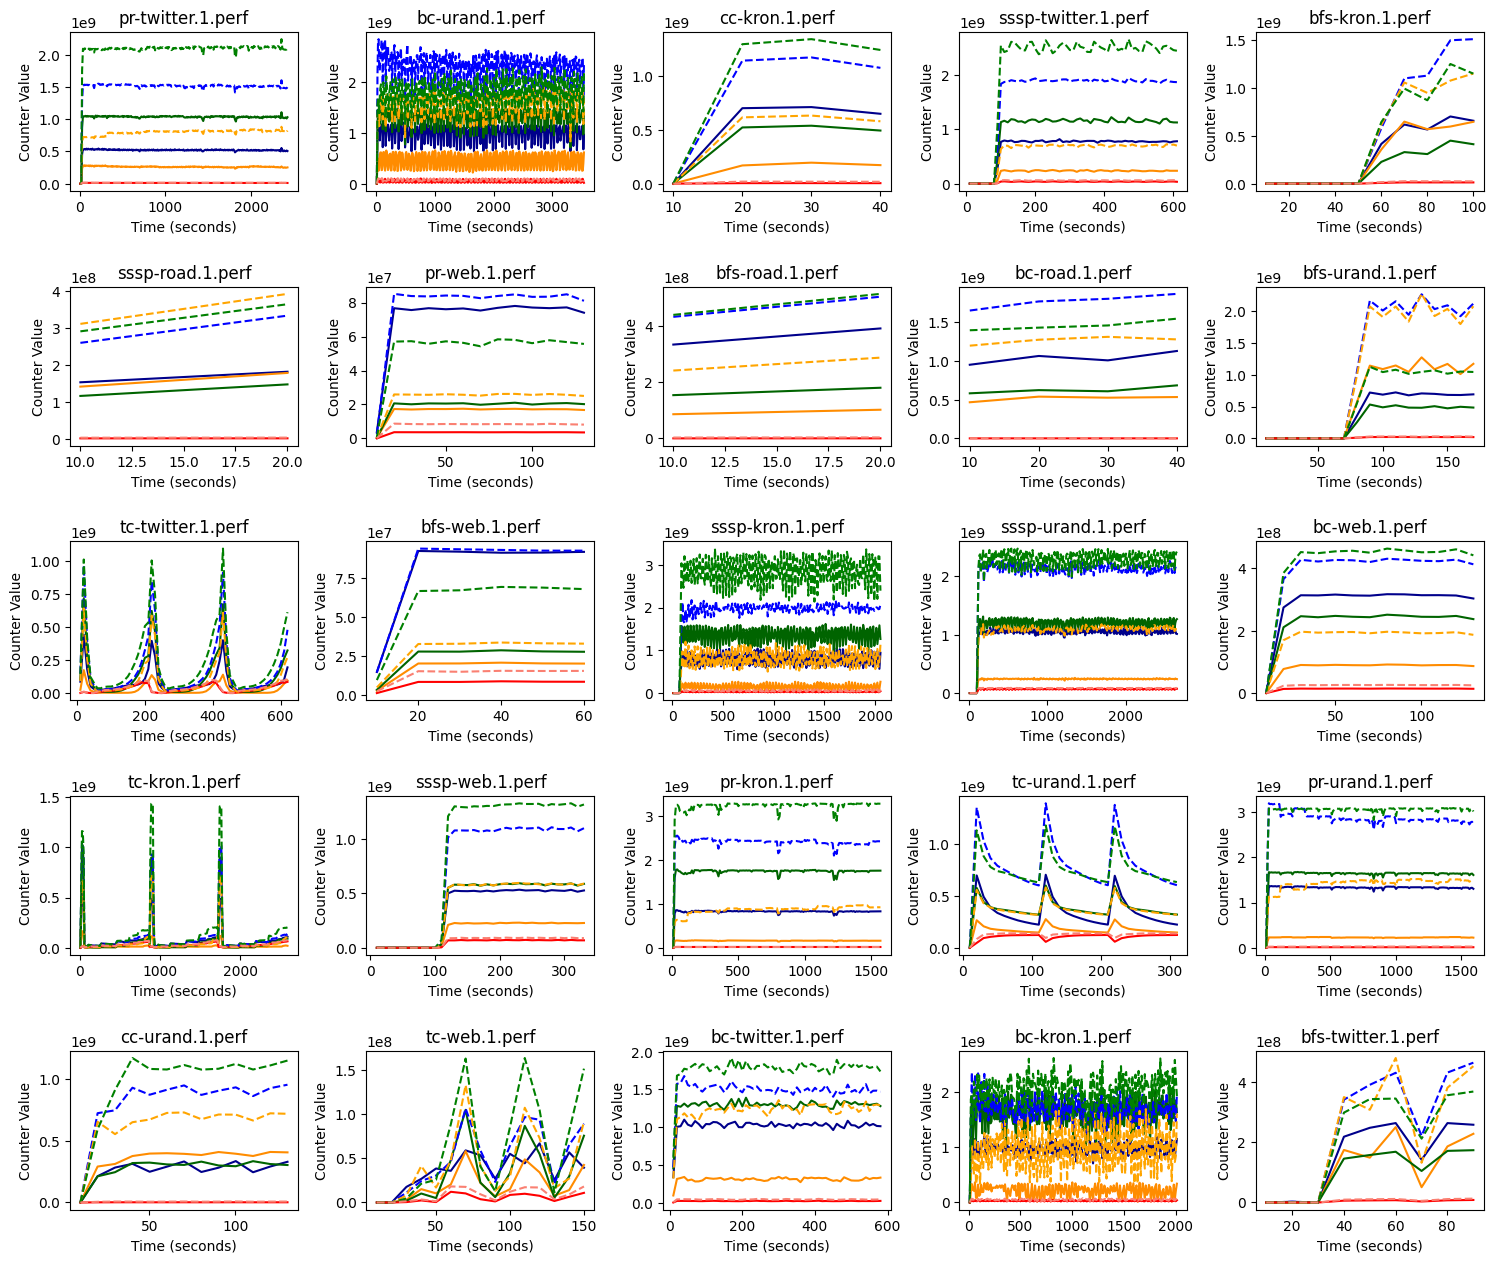

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

event_colors = {
    'page_walker_loads.dtlb_l1:u': 'darkblue',
    'page_walker_loads.dtlb_l2:u': 'darkorange',
    'page_walker_loads.dtlb_l3:u': 'darkgreen',
    'page_walker_loads.dtlb_memory:u': 'red',
    'page_walker_loads.ept_dtlb_l1:u': 'blue',
    'page_walker_loads.ept_dtlb_l2:u': 'orange',
    'page_walker_loads.ept_dtlb_l3:u': 'green',
    'page_walker_loads.ept_dtlb_memory:u': 'salmon'
}

def plot_perf_file(ax, filepath):
    df = pd.read_csv(filepath, comment='#', header=None, 
                     names=['time', 'counter_value', 'event_name'],
                     usecols=[0, 1, 3])
    cache_levels = list(event_colors.keys())
    cache_df = df[df['event_name'].isin(cache_levels)]

    if len(cache_df) <= 8:
        print(f"Insufficient data for {filepath}")
        return 0

    for event in cache_levels:
        event_df = cache_df[cache_df['event_name'] == event]
        if not event_df.empty:
            linestyle = "--" if "ept" in event else "-"
            sns.lineplot(data=event_df, x='time', y='counter_value', ax=ax, 
                         linestyle=linestyle, color=event_colors[event])

    ax.set_title(os.path.basename(filepath))
    ax.set_ylabel('Counter Value')
    ax.set_xlabel('Time (seconds)')
    return 1

directory_path = './perf_output/out_vm'
perf_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.perf')]

# Setting up the grid
n_rows = 6
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

idx = 0
for perf_file in perf_files:
    print(f"Processing file {idx + 1}/{len(perf_files)}: {perf_file}")
    row, col = divmod(idx, n_cols)
    idx += plot_perf_file(axes[row][col], perf_file)

# Remove any unused subplots
for i in range(idx, n_rows * n_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


Processing file ./perf_output/out_vm/bc-kron.1.perf and ./perf_output/out2/bc-kron.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']


/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[20.0874225]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/bc-road.1.perf and ./perf_output/out2/bc-road.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']
Processing file ./perf_output/out_vm/bc-twitter.1.perf and ./perf_output/out2/bc-twitter.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_lo

/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.57709794e+09]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7.39609518e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']


/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[54.52552947]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/bc-web.1.perf and ./perf_output/out2/bc-web.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']
Processing file ./perf_output/out_vm/bfs-kron.1.perf and ./perf_output/out2/bfs-kron.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_mis

/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[322967.97799012]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[113.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[7.16017774e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/bfs-twitter.1.perf and ./perf_output/out2/bfs-twitter.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']
Processing file ./perf_output/out_vm/bfs-urand.1.perf and ./perf_output/out2/bfs-urand.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'd

/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[193976.13687979]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[43.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[13030794.41526081]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/cc-kron.1.perf and ./perf_output/out2/cc-kron.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']
Processing file ./perf_output/out_vm/cc-road.1.perf and ./perf_output/out2/cc-road.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_mis

/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1163544.24921323]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[79.5]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[60.12570644]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/pr-road.1.perf and ./perf_output/out2/pr-road.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']
Empty data for ./perf_output/out_vm/pr-road.1.perf
Processing file ./perf_output/out_vm/pr-twitter.1.perf and ./perf_output/out2/pr-twitter.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_wal

/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[34.15257444]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/pr-urand.1.perf and ./perf_output/out2/pr-urand.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']


/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[31.90168544]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/pr-web.1.perf and ./perf_output/out2/pr-web.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']
Processing file ./perf_output/out_vm/sssp-kron.1.perf and ./perf_output/out2/sssp-kron.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_m

/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2013564.56747471]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[70.75426266]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/sssp-road.1.perf and ./perf_output/out2/sssp-road.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']
Processing file ./perf_output/out_vm/sssp-twitter.1.perf and ./perf_output/out2/sssp-twitter.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 

/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3.73406107e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[111.29480115]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[16.24227712]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/sssp-web.1.perf and ./perf_output/out2/sssp-web.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']
Processing file ./perf_output/out_vm/tc-kron.1.perf and ./perf_output/out2/tc-kron.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_m

/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[86.84592948]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1125079.46587233]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/tc-twitter.1.perf and ./perf_output/out2/tc-twitter.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']
Processing file ./perf_output/out_vm/tc-urand.1.perf and ./perf_output/out2/tc-urand.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_

/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[1.49794271e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[39.64876653]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


Processing file ./perf_output/out_vm/tc-web.1.perf and ./perf_output/out2/tc-web.1.perf
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u', 'page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u']
['dtlb_load_misses.miss_causes_a_walk:u', 'dtlb_load_misses.pde_cache_miss:u', 'dtlb_load_misses.walk_completed_4k:u', 'mem_uops_retired.stlb_miss_loads:u']


/tmp/ipykernel_820025/1761079260.py:48: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[52.06771197]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)


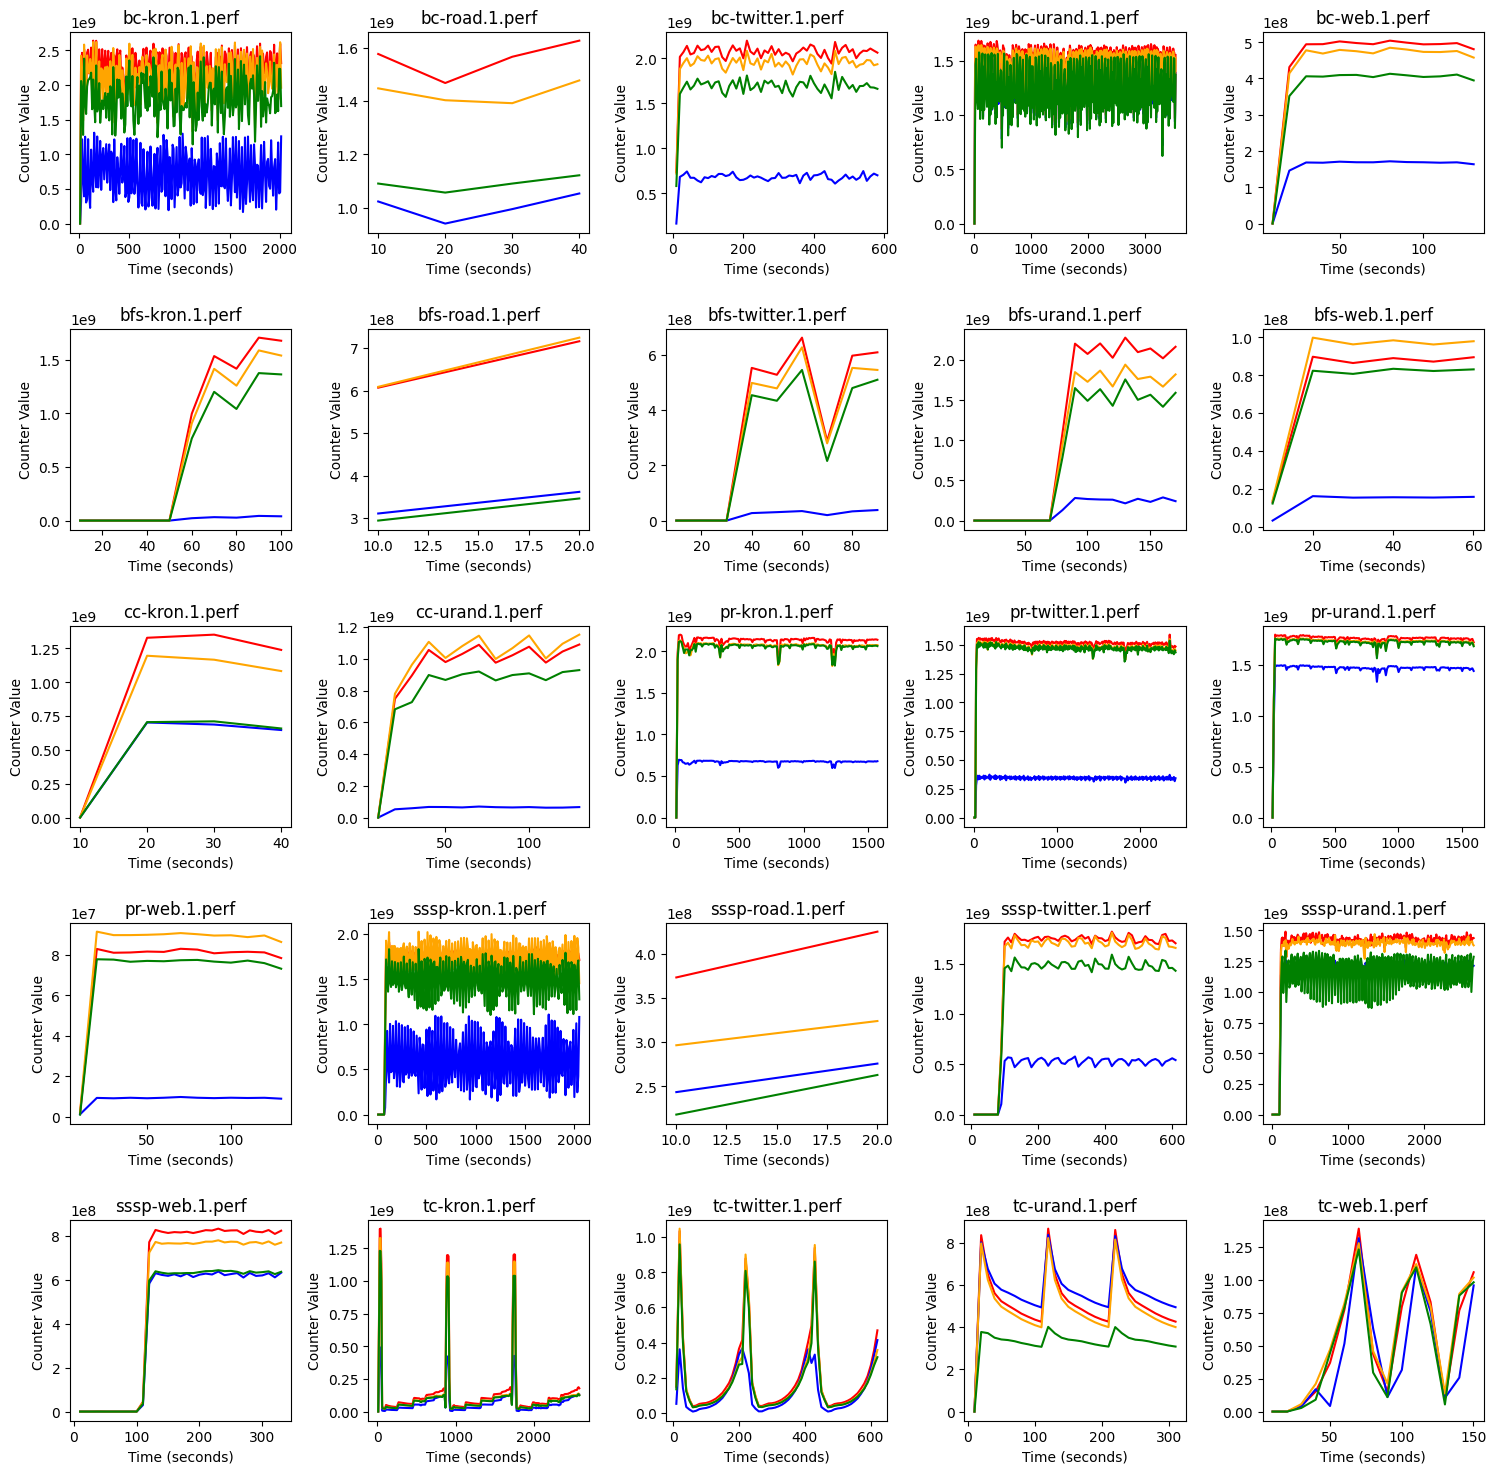

In [7]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def get_df(filepath, is_vm = True):
    cache_levels = ['dtlb_load_misses.miss_causes_a_walk:u', 
                    'dtlb_load_misses.pde_cache_miss:u', 
                    'dtlb_load_misses.walk_completed_4k:u', 
                    'mem_uops_retired.stlb_miss_loads:u'] 
    cache_levels += ['page_walker_loads.dtlb_l1:u', 'page_walker_loads.dtlb_l2:u', 'page_walker_loads.dtlb_l3:u', 'page_walker_loads.dtlb_memory:u'] if not is_vm else []
    df = pd.read_csv(filepath, comment='#', header=None, 
                     names=['time', 'counter_value', 'event_name'],
                     usecols=[0, 1, 3])
    print(cache_levels)
    return df[df['event_name'].isin(cache_levels)].copy()

def plot_perf_file(ax, filepath, df_host):
    # Map of event names to colors
    colors = {
        'dtlb_load_misses.miss_causes_a_walk:u': 'red',
        'dtlb_load_misses.pde_cache_miss:u': 'blue',
        'dtlb_load_misses.walk_completed_4k:u': 'orange',
        'mem_uops_retired.stlb_miss_loads:u': 'green'
    }

    cache_df = get_df(filepath)
    
    if len(cache_df) <= 5:
        print(f"Empty data for {filepath}")
        return 0

    walker_hits = df_host[df_host['event_name'].str.startswith('page_walker_loads.dtlb_l')]['counter_value'].sum() + \
                      df_host[df_host['event_name'] == 'page_walker_loads.dtlb_memory:u']['counter_value'].sum()
    miss_causes_walk = df_host[df_host['event_name'] == 'dtlb_load_misses.miss_causes_a_walk:u']['counter_value'].sum()
    ratio = max(0, (walker_hits / miss_causes_walk) - 1) if miss_causes_walk != 0 else 0
    
    # Calculate ratio for each time point
    time_groups = cache_df.groupby('time')
    for time, group in time_groups:
        # pde_misses = group[group['event_name'] == 'dtlb_load_misses.pde_cache_miss:u']['counter_value'].sum()
        # completed_walks = group[group['event_name'] == 'dtlb_load_misses.walk_completed_4k:u']['counter_value'].sum()
        # ratio = min(1, pde_misses / completed_walks) if completed_walks != 0 else 1

        # Apply the division for 'miss_causes_a_walk' at this time point
        mask = (cache_df['time'] == time) & (cache_df['event_name'] == 'dtlb_load_misses.miss_causes_a_walk:u')
        cache_df.loc[mask, 'counter_value'] *= (1/2 - ratio/6)
        # cache_df.loc[mask, 'counter_value'] *= (1/2 )

    for event_name, color in colors.items():
        event_df = cache_df[cache_df['event_name'] == event_name]
        if not event_df.empty:
            sns.lineplot(data=event_df, x='time', y='counter_value', ax=ax, color=color)

    ax.set_title(os.path.basename(filepath))
    ax.set_ylabel('Counter Value')
    ax.set_xlabel('Time (seconds)')
    # No legend
    return 1

directory_host = './perf_output/out2'
directory_path = './perf_output/out_vm'
perf_files_host = [os.path.join(directory_host, f) for f in os.listdir(directory_host) if f.endswith('.perf') and "tc-road" not in f]
perf_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.perf') and "tc-road" not in f]

# Setting up the grid
n_rows = 5
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

idx = 0
for (perf_file, pf_host) in zip(sorted(perf_files), sorted(perf_files_host)):
    print(f"Processing file {perf_file} and {pf_host}")
    row, col = divmod(idx, n_cols)
    idx += plot_perf_file(axes[row][col], perf_file, get_df(pf_host, False))

plt.tight_layout()
plt.show()


Processing file 1/29: ./perf_output/out/pr-road.1.perf
Empty data for ./perf_output/out/pr-road.1.perf
Processing file 1/29: ./perf_output/out/pr-twitter.1.perf
Processing file 2/29: ./perf_output/out/bc-urand.1.perf
Processing file 3/29: ./perf_output/out/cc-kron.1.perf
Processing file 4/29: ./perf_output/out/sssp-twitter.1.perf
Processing file 5/29: ./perf_output/out/bfs-kron.1.perf
Processing file 6/29: ./perf_output/out/sssp-road.1.perf
Empty data for ./perf_output/out/sssp-road.1.perf
Processing file 6/29: ./perf_output/out/pr-web.1.perf
Processing file 7/29: ./perf_output/out/bfs-road.1.perf
Empty data for ./perf_output/out/bfs-road.1.perf
Processing file 7/29: ./perf_output/out/bc-road.1.perf
Processing file 8/29: ./perf_output/out/bfs-urand.1.perf
Processing file 9/29: ./perf_output/out/tc-twitter.1.perf
Processing file 10/29: ./perf_output/out/bfs-web.1.perf
Processing file 11/29: ./perf_output/out/sssp-kron.1.perf
Processing file 12/29: ./perf_output/out/cc-twitter.1.perf
Emp

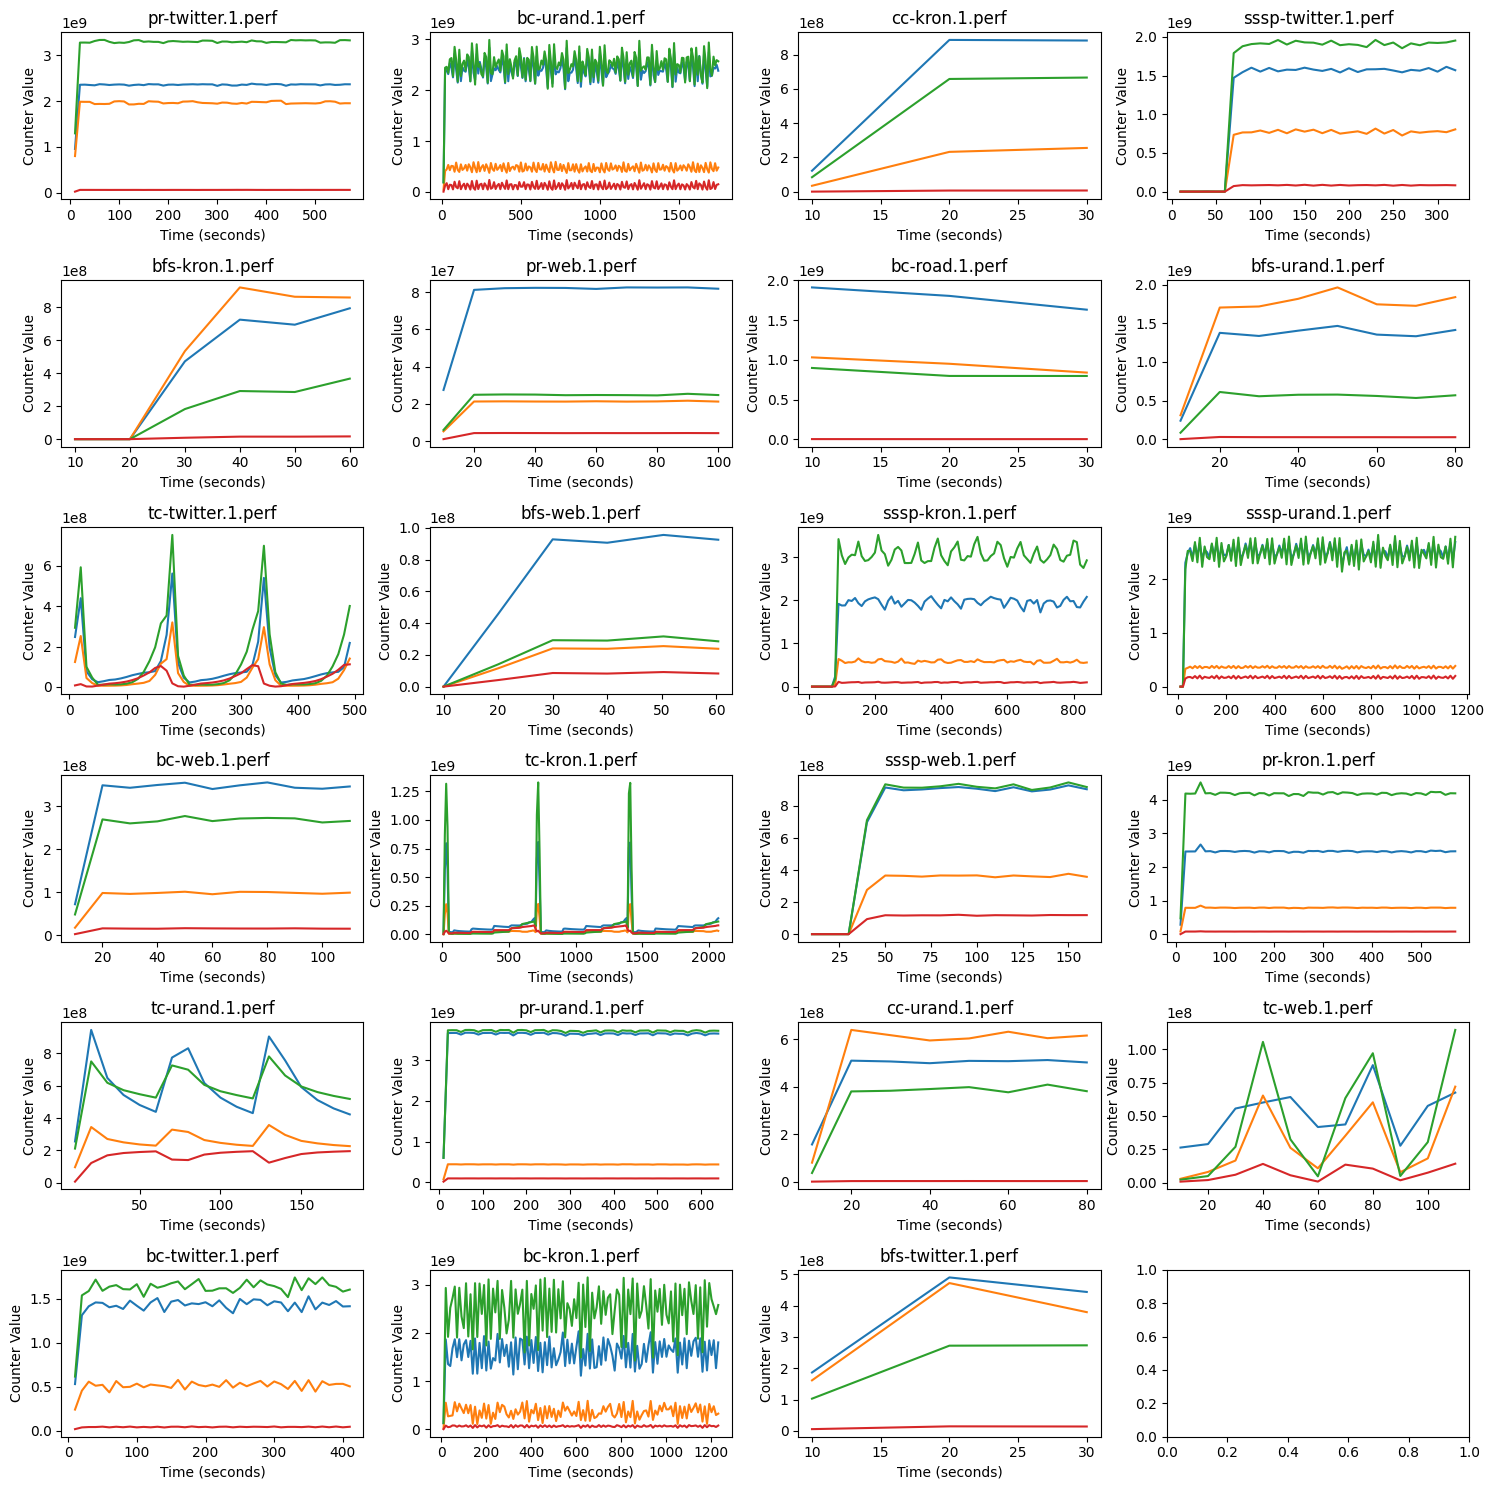

In [9]:
num_empties = 0
def plot_perf_file(ax, filepath):
    global num_empties
    df = pd.read_csv(filepath, comment='#', header=None, 
                     names=['time', 'counter_value', 'event_name'],
                     usecols=[0, 1, 3])
    cache_levels = ['page_walker_loads.dtlb_l1:u', 
                    'page_walker_loads.dtlb_l2:u', 
                    'page_walker_loads.dtlb_l3:u', 
                    'page_walker_loads.dtlb_memory:u']
    cache_df = df[df['event_name'].isin(cache_levels)]
    if len(cache_df) <= 8:
        print(f"Empty data for {filepath}")
        num_empties += 1
        return 0

    sns.lineplot(data=cache_df, x='time', y='counter_value', hue='event_name', ax=ax, legend=False)
    ax.set_title(os.path.basename(filepath))
    ax.set_ylabel('Counter Value')
    ax.set_xlabel('Time (seconds)')
    return 1
    # ax.legend(loc='upper right')

directory_path = './perf_output/out'
perf_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.perf')]

# Setting up the grid
n_rows = 6
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

idx = 0
for perf_file in perf_files:
    print(f"Processing file {idx + 1}/{len(perf_files)}: {perf_file}")
    row, col = divmod(idx, n_cols)
    idx += plot_perf_file(axes[row][col], perf_file)

print("Blue - L1, Orange -L2, Green - L3, red - memory")
print("num empties", num_empties)
plt.tight_layout()
plt.show()

Processing file 1/29: ./perf_output/out/pr-road.1.perf
Empty data for ./perf_output/out/pr-road.1.perf
Processing file 1/29: ./perf_output/out/pr-twitter.1.perf
Processing file 2/29: ./perf_output/out/bc-urand.1.perf
Processing file 3/29: ./perf_output/out/cc-kron.1.perf
Processing file 4/29: ./perf_output/out/sssp-twitter.1.perf
Processing file 5/29: ./perf_output/out/bfs-kron.1.perf
Processing file 6/29: ./perf_output/out/sssp-road.1.perf
Empty data for ./perf_output/out/sssp-road.1.perf
Processing file 6/29: ./perf_output/out/pr-web.1.perf
Processing file 7/29: ./perf_output/out/bfs-road.1.perf
Empty data for ./perf_output/out/bfs-road.1.perf
Processing file 7/29: ./perf_output/out/bc-road.1.perf
Processing file 8/29: ./perf_output/out/bfs-urand.1.perf
Processing file 9/29: ./perf_output/out/tc-twitter.1.perf
Processing file 10/29: ./perf_output/out/bfs-web.1.perf
Processing file 11/29: ./perf_output/out/sssp-kron.1.perf
Processing file 12/29: ./perf_output/out/cc-twitter.1.perf
Emp

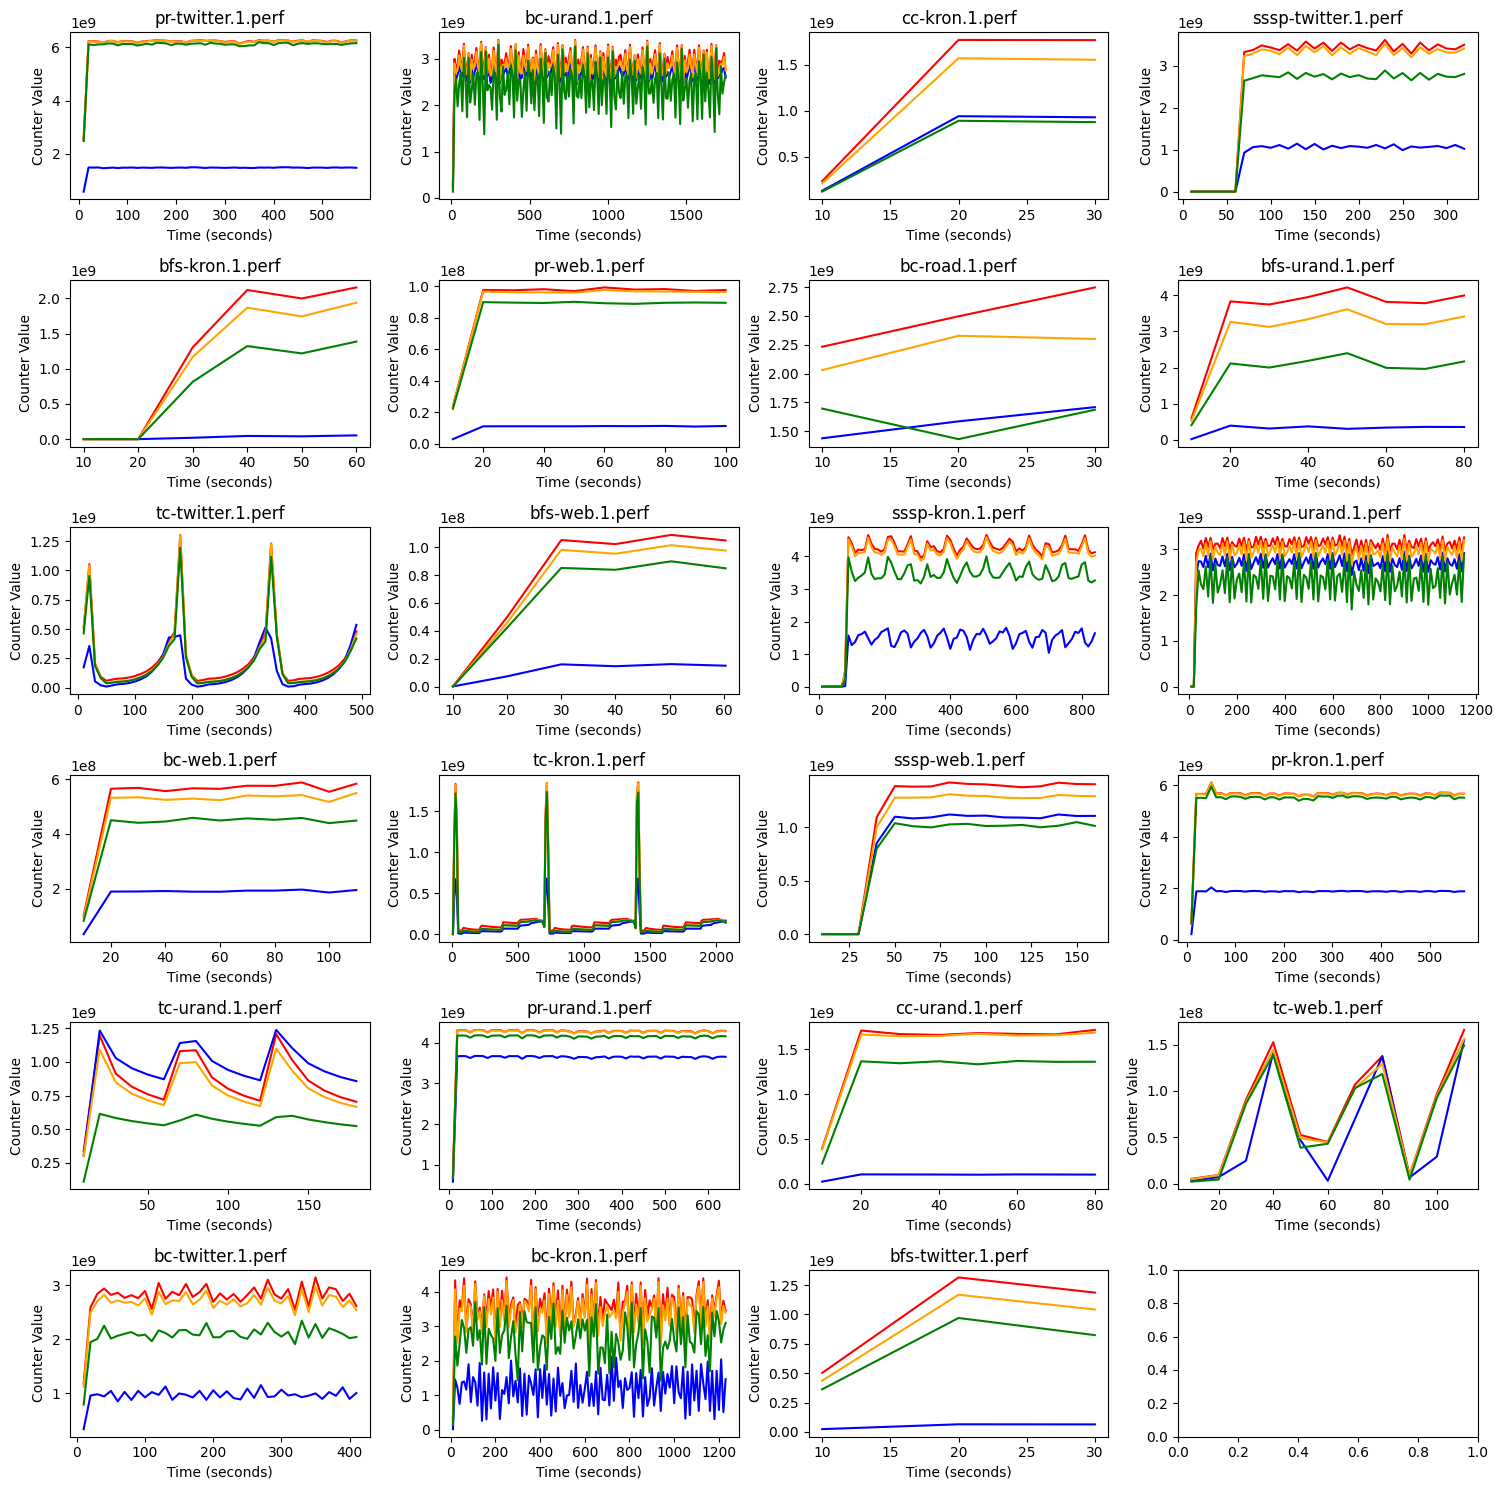

In [10]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_perf_file(ax, filepath):
    df = pd.read_csv(filepath, comment='#', header=None, 
                     names=['time', 'counter_value', 'event_name'],
                     usecols=[0, 1, 3])
    cache_levels = ['dtlb_load_misses.miss_causes_a_walk:u', 
                    'dtlb_load_misses.pde_cache_miss:u', 
                    'dtlb_load_misses.walk_completed_4k:u', 
                    'mem_uops_retired.stlb_miss_loads:u']

    # Map of event names to colors
    colors = {
        'dtlb_load_misses.miss_causes_a_walk:u': 'red',
        'dtlb_load_misses.pde_cache_miss:u': 'blue',
        'dtlb_load_misses.walk_completed_4k:u': 'orange',
        'mem_uops_retired.stlb_miss_loads:u': 'green'
    }

    cache_df = df[df['event_name'].isin(cache_levels)]
    
    if len(cache_df) <= 8:
        print(f"Empty data for {filepath}")
        return 0

    for event_name, color in colors.items():
        event_df = cache_df[cache_df['event_name'] == event_name]
        if not event_df.empty:
            sns.lineplot(data=event_df, x='time', y='counter_value', ax=ax, color=color)

    ax.set_title(os.path.basename(filepath))
    ax.set_ylabel('Counter Value')
    ax.set_xlabel('Time (seconds)')
    # No legend
    return 1

directory_path = './perf_output/out'
perf_files = [os.path.join(directory_path, f) for f in os.listdir(directory_path) if f.endswith('.perf')]

# Setting up the grid
n_rows = 6
n_cols = 4
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5, wspace=0.4)

idx = 0
for perf_file in perf_files:
    print(f"Processing file {idx + 1}/{len(perf_files)}: {perf_file}")
    row, col = divmod(idx, n_cols)
    idx += plot_perf_file(axes[row][col], perf_file)

plt.tight_layout()
plt.show()
